# Beta-diversity shipping 16S

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


start with ASVs

In [4]:
import qiime2
from skbio.stats.distance import permanova, DistanceMatrix

#load distance matrices for LP5 (both the non-merged and merged tables):
#jaccard:
jaccard_dm_ITS_ASV = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_ASV = jaccard_dm_ITS_ASV.view(DistanceMatrix)

jaccard_dm_ITS_ASV_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_ASV_merged = jaccard_dm_ITS_ASV_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_ITS_ASV = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_ASV = bray_dm_ITS_ASV.view(DistanceMatrix)

bray_dm_ITS_ASV_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_ASV_merged = bray_dm_ITS_ASV_merged.view(DistanceMatrix)

OTUs

In [5]:
jaccard_dm_ITS_OTU = qiime2.Artifact.load('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_OTU = jaccard_dm_ITS_OTU.view(DistanceMatrix)

jaccard_dm_ITS_OTU_merged = qiime2.Artifact.load('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_OTU_merged = jaccard_dm_ITS_OTU_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_ITS_OTU = qiime2.Artifact.load('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_OTU = bray_dm_ITS_OTU.view(DistanceMatrix)

bray_dm_ITS_OTU_merged = qiime2.Artifact.load('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_OTU_merged = bray_dm_ITS_OTU_merged.view(DistanceMatrix)

kmers - no tfidf

In [6]:

jaccard_dm_ITS_k = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_k = jaccard_dm_ITS_k.view(DistanceMatrix)

jaccard_dm_ITS_k_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_k_merged = jaccard_dm_ITS_k_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_ITS_k = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_k = bray_dm_ITS_k.view(DistanceMatrix)

bray_dm_ITS_k_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_k_merged = bray_dm_ITS_k_merged.view(DistanceMatrix)

kmers - with tfidf

In [7]:

jaccard_dm_ITS_kt = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_kt = jaccard_dm_ITS_kt.view(DistanceMatrix)

jaccard_dm_ITS_kt_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_ITS_kt_merged = jaccard_dm_ITS_kt_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_ITS_kt = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_kt = bray_dm_ITS_kt.view(DistanceMatrix)

bray_dm_ITS_kt_merged = qiime2.Artifact.load('ITS/ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_ITS_kt_merged = bray_dm_ITS_kt_merged.view(DistanceMatrix)

In [8]:
from skbio.stats.ordination import pcoa

dms = {
    'jaccard_dm_ITS_ASV': jaccard_dm_ITS_ASV,
   
    'bray_dm_ITS_ASV': bray_dm_ITS_ASV ,
   
    'jaccard_dm_ITS_OTU': jaccard_dm_ITS_OTU,
  
    'bray_dm_ITS_OTU': bray_dm_ITS_OTU,
   
    'jaccard_dm_ITS_k': jaccard_dm_ITS_k,
  
    'bray_dm_ITS_k': bray_dm_ITS_k,
  
    'jaccard_dm_ITS_kt': jaccard_dm_ITS_kt,
   
    'bray_dm_ITS_kt': bray_dm_ITS_kt
  
    

    }

In [10]:
#import sample metadata called shipping_general_metadata_all_samples.tsv as a dataframe, index is col 'SampleID'
#import this 20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv:

shipping_general_metadata_all_samples = pd.read_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.csv', sep=',', index_col=0)

shipping_general_metadata_all_samples



,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,16S_id,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Observed features kmers ITS,Shannon ASVs ITS,Evenness ASVs ITS,Simpson ASVs ITS,Shannon OTUs ITS,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS
366292_209-LP4-ITS-0709,747.0,2.00,4.000000,366294_209-LP4-16S-0709,678.0,5.0,4.0,W00.00.00,E,5,...,747.0,1.023700,0.511850,0.387775,0.301049,0.301049,0.101261,8.420116,0.882153,0.996797
366292_121-LP4-ITS-0621,1052.0,4.00,6.000000,366294_121-LP4-16S-0621,244.0,1.0,1.0,W30.02.28,E,6,...,1052.0,0.973628,0.376651,0.377949,0.220637,0.110319,0.056100,8.340575,0.830824,0.996682
366292_212-LP4-ITS-0712,1253.0,7.50,7.000000,366294_212-LP4-16S-0712,718.0,5.0,6.0,W30.03.21,H,5,...,1253.0,0.813642,0.289825,0.337533,0.091995,0.032769,0.017630,8.253068,0.801956,0.996594
366292_225-LP4-ITS-0725,1212.0,5.00,7.000000,366294_225-LP4-16S-0725,708.0,6.0,5.0,W17.02.14,E,7,...,1212.0,0.800344,0.285088,0.338125,0.051600,0.022223,0.009683,8.229968,0.803459,0.996578
366292_201-LP4-ITS-0701,1204.0,5.00,8.000000,366294_201-LP4-16S-0701,708.0,5.0,5.0,W04.02.04,E,4,...,1204.0,1.144517,0.381506,0.390090,0.329954,0.142104,0.083077,8.529651,0.833493,0.996862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366292_181-LP4-ITS-0681,3357.0,23.50,26.428571,366294_181-LP4-16S-0681,708.0,5.0,5.0,W30.03.03,A,2,...,3357.0,1.155855,0.248900,0.388582,0.459375,0.103012,0.101151,8.474403,0.723507,0.996769
366292_251-LP4-ITS-0751,3265.0,16.25,34.000000,366294_251-LP4-16S-0751,708.0,5.0,8.0,W04.03.01,G,10,...,3265.0,1.052332,0.226607,0.377837,0.284167,0.071042,0.057944,8.393120,0.719028,0.996696
366292_260-LP4-ITS-0760,3137.0,23.50,32.000000,366294_260-LP4-16S-0760,708.0,5.0,5.0,W30.02.01,H,11,...,3137.0,1.222896,0.263336,0.410682,0.527800,0.116678,0.117316,8.511062,0.732754,0.996812
366292_264-LP4-ITS-0764,3434.0,30.20,25.375000,366294_264-LP4-16S-0764,708.0,5.0,5.0,W04.03.04,D,12,...,3434.0,1.233053,0.265523,0.405510,0.487944,0.103808,0.102250,8.521965,0.725541,0.996818


In [11]:
#save as tsv:
shipping_general_metadata_all_samples.to_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.tsv', sep='\t')

In [13]:
from qiime2 import Metadata
metadata = Metadata.load('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.tsv')  # Adjust path to your metadata file


In [14]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

calculate adonis:

In [15]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature*day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp-day.qzv')

Running ADONIS for jaccard_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpp8uhtjtd/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpp8uhtjtd/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-fvt_eep0/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpbaizgyfl/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpbaizgyfl/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-r9vkljlz/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplb16bkm2/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplb16bkm2/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-64kmpkb8/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnzbrz0s4/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnzbrz0s4/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-fvggo1un/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpisvugy3_/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpisvugy3_/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-75io0ei9/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpbsro8qpb/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpbsro8qpb/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-anlnagd_/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmperx1avod/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmperx1avod/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-zp5g0ciy/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpjhx87tjk/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpjhx87tjk/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-xnh02q6d/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [16]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature/day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp_nested_in_day.qzv')

Running ADONIS for jaccard_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp9gvcz8l1/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp9gvcz8l1/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-2igr01sg/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp4sevd5b6/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp4sevd5b6/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-2rn4pity/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpl67323ei/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpl67323ei/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-ya7s3ilc/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpa58kcx8h/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpa58kcx8h/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-yc_qgaxb/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcovxabx8/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcovxabx8/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-ynslpgp7/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmsba6key/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmsba6key/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-zae69wwb/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp_rbeyq7p/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp_rbeyq7p/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-oyz28_sa/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp7v8b_nt6/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp7v8b_nt6/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-8lcp4t6e/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [17]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='day/temperature',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_day_nested_in_temp.qzv')

Running ADONIS for jaccard_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnoyq7yr5/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnoyq7yr5/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-vlxkjz2m/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpyez6pad5/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpyez6pad5/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-at8765ub/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpdh961kjo/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpdh961kjo/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-fri_gw6j/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpm1gysj16/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpm1gysj16/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-qjvua42c/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpgx5rwpvc/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpgx5rwpvc/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-xmucxlg6/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmg706xiy/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmg706xiy/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-cw4k3ms0/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpp8vwnvrh/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpp8vwnvrh/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-tzcxvx03/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_ITS_kt...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpxi5ravo5/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpxi5ravo5/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-0hkv3e8u/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [24]:
#import the excel file with the compiled results (also with interactions):
nested_results_df = pd.read_excel("Stats/20250618_compiled_adonis_16S.xlsx", sheet_name='ITS_2')
nested_results_df

,R2 day,p day,Mean R2 temperature(day),Mean p temperature(day),R2 temperature,p temperature,R2 day:temperature,p day:temperature,Mean R2 day(temperature),Mean p day(temperature),Matrix
0,0.051798,0.001,0.029738,0.002,0.018202,0.063,0.012203,0.292,0.053334,0.002,jaccard_dm_ITS_ASV
1,0.106882,0.001,0.068081,0.002,0.028236,0.031,0.037185,0.014,0.139463,0.001,bray_dm_ITS_ASV
2,0.044985,0.001,0.039515,0.001,0.023172,0.010,0.022661,0.008,0.048009,0.001,jaccard_dm_ITS_OTU
3,0.137170,0.001,0.098807,0.001,0.041119,0.009,0.053725,0.006,0.183145,0.001,bray_dm_ITS_OTU
4,0.061929,0.001,0.029801,0.006,0.015950,0.125,0.013868,0.204,0.061167,0.001,jaccard_dm_ITS_k
5,0.152103,0.001,0.111348,0.001,0.042734,0.015,0.064121,0.005,0.213123,0.001,bray_dm_ITS_k


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


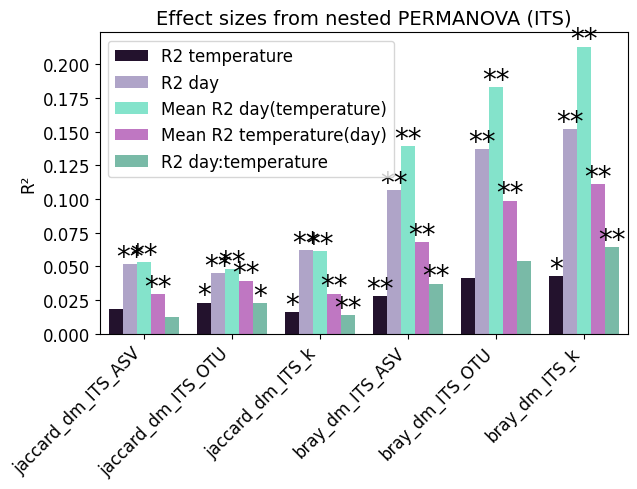

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'jaccard_dm_ITS_ASV',
    'jaccard_dm_ITS_OTU',
    'jaccard_dm_ITS_k',
    'bray_dm_ITS_ASV',
    'bray_dm_ITS_OTU',
    'bray_dm_ITS_k'
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)',
        'R2 day:temperature'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)',
    'R2 day:temperature': 'p day:temperature'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF',  # Green
    'R2 day:temperature': '#6EC5ABFF'  # Purple
}

# Plot with bar handle
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.005,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (ITS)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250618_nested_permanova_effect_sizes_ITS_qiime.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [65]:
#import and merge the two outputs:
nested_results_df = pd.read_csv("Stats/20250514_nested_permanova_temperature_day_beta_ITS.csv")
nested_results_df_2 = pd.read_csv("Stats/20250514_nested_permanova_day_temperature_beta_ITS.csv")

#merge them:
nested_results_df = pd.merge(nested_results_df, nested_results_df_2, on='Matrix')

nested_results_df




,Matrix,R2 temperature,p temperature,Mean R2 day(temperature),Mean p day(temperature),R2 day,p day,Mean R2 temperature(day),Mean p temperature(day)
0,jaccard_dm_ITS_ASV,1.320945,0.151,1.256003,0.212667,1.661506,0.002,1.157514,0.459455
1,jaccard_dm_ITS_ASV_merged,2.119371,0.006,1.285655,0.199333,1.823853,0.001,1.228527,0.441000
2,bray_dm_ITS_ASV,1.842625,0.086,1.711340,0.150333,2.202256,0.002,1.663449,0.383182
3,bray_dm_ITS_ASV_merged,53.801484,0.005,1.119146,0.246333,15.439581,0.002,1.594748,0.412000
4,jaccard_dm_ITS_OTU,1.852396,0.010,1.250708,0.266000,1.448221,0.002,1.249115,0.368909
5,jaccard_dm_ITS_OTU_merged,2.502536,0.002,1.306668,0.210000,1.644039,0.001,1.322946,0.331364
6,bray_dm_ITS_OTU,2.478749,0.060,2.105832,0.308333,2.918835,0.001,2.576764,0.279727
7,bray_dm_ITS_OTU_merged,56.184599,0.008,1.485023,0.285333,15.941782,0.008,2.368727,0.326455
8,jaccard_dm_ITS_k,1.516457,0.092,1.248247,0.269667,1.684623,0.001,1.155528,0.436000
9,jaccard_dm_ITS_k_merged,2.365848,0.006,1.278009,0.241333,1.930268,0.001,1.188179,0.417091


In [66]:
nested_results_df['Matrix'].unique()

array(['jaccard_dm_ITS_ASV', 'jaccard_dm_ITS_ASV_merged',
       'bray_dm_ITS_ASV ', 'bray_dm_ITS_ASV_merged', 'jaccard_dm_ITS_OTU',
       'jaccard_dm_ITS_OTU_merged', 'bray_dm_ITS_OTU',
       'bray_dm_ITS_OTU_merged', 'jaccard_dm_ITS_k',
       'jaccard_dm_ITS_k_merged', 'bray_dm_ITS_k', 'bray_dm_ITS_k_merged',
       'jaccard_dm_ITS_kt', 'jaccard_dm_ITS_kt_merged', 'bray_dm_ITS_kt',
       'bray_dm_ITS_kt_merged'], dtype=object)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


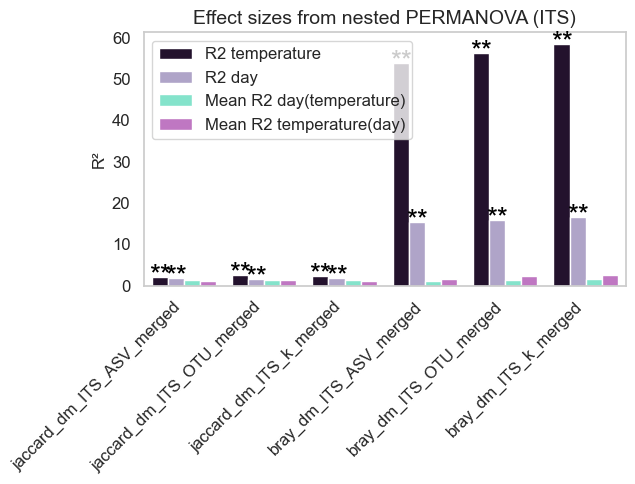

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
# selected_matrices = [
#     'jaccard_dm_ITS_ASV',
#     'jaccard_dm_ITS_OTU',
#     'jaccard_dm_ITS_k',
#     'bray_dm_ITS_ASV ',
#     'bray_dm_ITS_OTU',
#     'bray_dm_ITS_k'
    
# ]

selected_matrices_m = [
    'jaccard_dm_ITS_ASV_merged',
    'jaccard_dm_ITS_OTU_merged',
    'jaccard_dm_ITS_k_merged',
    'bray_dm_ITS_ASV_merged',
    'bray_dm_ITS_OTU_merged',
    'bray_dm_ITS_k_merged'
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices_m)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices_m, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF'  # Green
}

# Plot with bar handle
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -3,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (ITS)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_ITS_merged.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [117]:
print(melted[melted['Matrix'] == 'bray_dm_16S_ASV'])

Empty DataFrame
Columns: [Matrix, Factor, R2, Significance]
Index: []


and visualize per day/ per temperature

In [84]:
selected_matrices1 = [
 'jaccard_dm_ITS_ASV',
 'jaccard_dm_ITS_OTU',
 'jaccard_dm_ITS_k',
 'bray_dm_ITS_ASV',
 'bray_dm_ITS_OTU',
 'bray_dm_ITS_k'
]

In [99]:
selected_matrices

['jaccard_dm_16S_ASV',
 'jaccard_dm_16S_OTU',
 'jaccard_dm_16S_k',
 'bray_dm_16S_ASV',
 'bray_dm_16S_OTU',
 'bray_dm_16S_k']

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


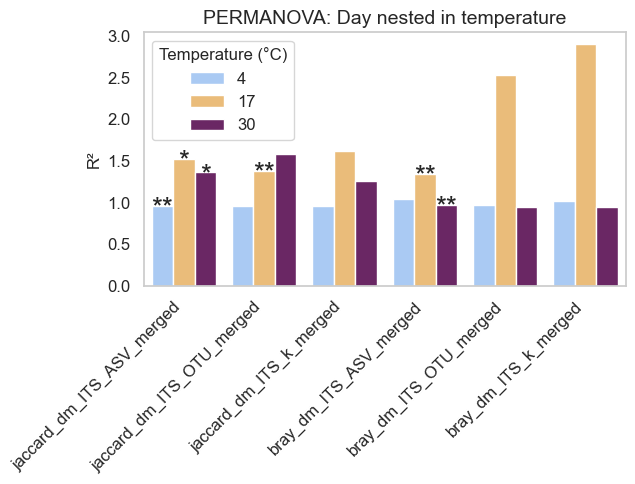

In [100]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_temperature_beta_ITS.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices_m)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'temperature'],
    value_vars=['PERMANOVA R2 day(temperature)', 'p day(temperature)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'temperature', 'R2']], p_df[['Matrix', 'temperature', 'p_value']], on=['Matrix', 'temperature'])
base_colors = {
    '4': '#9EC8FFFF',
    '17': '#FDC067FF',
    '30': '#751C6DFF'
}

# base_colors = {
#     '#FDC067FF',
#     '#9EC8FFFF',
    
#     '#751C6DFF'
# }

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)



# Plot per temperature
plt.figure(figsize=(6.5, 5))
plot_df['temperature'] = pd.Categorical(
    plot_df['temperature'].astype(str),
    categories=['4', '17', '30'],
    ordered=True
)
plot_df['Matrix'] = plot_df['Matrix'].astype(str).str.strip()
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices_m, ordered=True)



ax = sns.barplot(
    data=plot_df,
    x='Matrix',
    y='R2',
    hue='temperature',
    palette=base_colors
)



# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.2 , row['Significance'], ha='center', va='bottom', fontsize=20)

plt.title("PERMANOVA: Day nested in temperature", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Temperature (°C)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_temperature_ITS_merged.pdf", format='pdf', bbox_inches='tight')
plt.show()


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


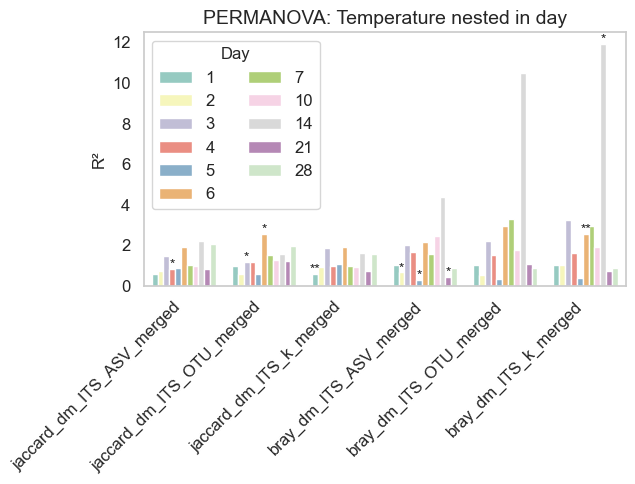

In [102]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_day_temperature_beta_ITS.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices_m)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'day'],
    value_vars=['PERMANOVA R2 temperature(day)', 'p temperature(day)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'day', 'R2']], p_df[['Matrix', 'day', 'p_value']], on=['Matrix', 'day'])

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices_m, ordered=True)

# Set color palette with 11 different colors:
palette = sns.color_palette("Set3", 11) 


# Plot per temperature
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=plot_df, x='Matrix', y='R2', hue='day', palette=palette)

# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.1, row['Significance'], ha='center', va='bottom', fontsize=10)

plt.title("PERMANOVA: Temperature nested in day", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Day', fontsize=12, ncol=2)
plt.xlabel("", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_day_ITS_merged.pdf", format='pdf', bbox_inches='tight')
plt.show()